In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ola-bike-ride-request/ola.csv


# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/ola-bike-ride-request/ola.csv')
df

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213
...,...,...,...,...,...,...,...,...,...
10881,2012-03-29 09:00:00,4,4,28.24,67.88,47.74,48,28,76
10882,2012-03-29 10:00:00,3,4,17.13,22.36,15.27,4,1,5
10883,2012-03-29 11:00:00,3,3,19.83,99.17,30.35,38,10,48
10884,2012-03-29 12:00:00,2,4,15.70,77.30,40.16,36,15,51


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  float64
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 765.6+ KB


In [4]:
df.describe(include='all')

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.493937,2.491916,20.137973,59.946072,24.960981,24.517545,99.551442,124.068988
std,NaN,1.120531,1.123139,8.696625,22.987200,14.424684,14.390014,57.541131,59.449265
min,NaN,1.000000,1.000000,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,1.000000,12.630000,40.040000,12.522500,12.000000,50.000000,74.000000
50%,NaN,2.000000,2.000000,20.190000,59.970000,25.000000,25.000000,100.000000,124.000000
75%,NaN,3.000000,4.000000,27.707500,79.620000,37.427500,37.000000,149.000000,174.000000


# Vizualization Section

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_style('whitegrid')

In [7]:
cols = ['season', 'weather', 'temp', 'humidity', 'windspeed',
       'casual', 'registered', 'count']

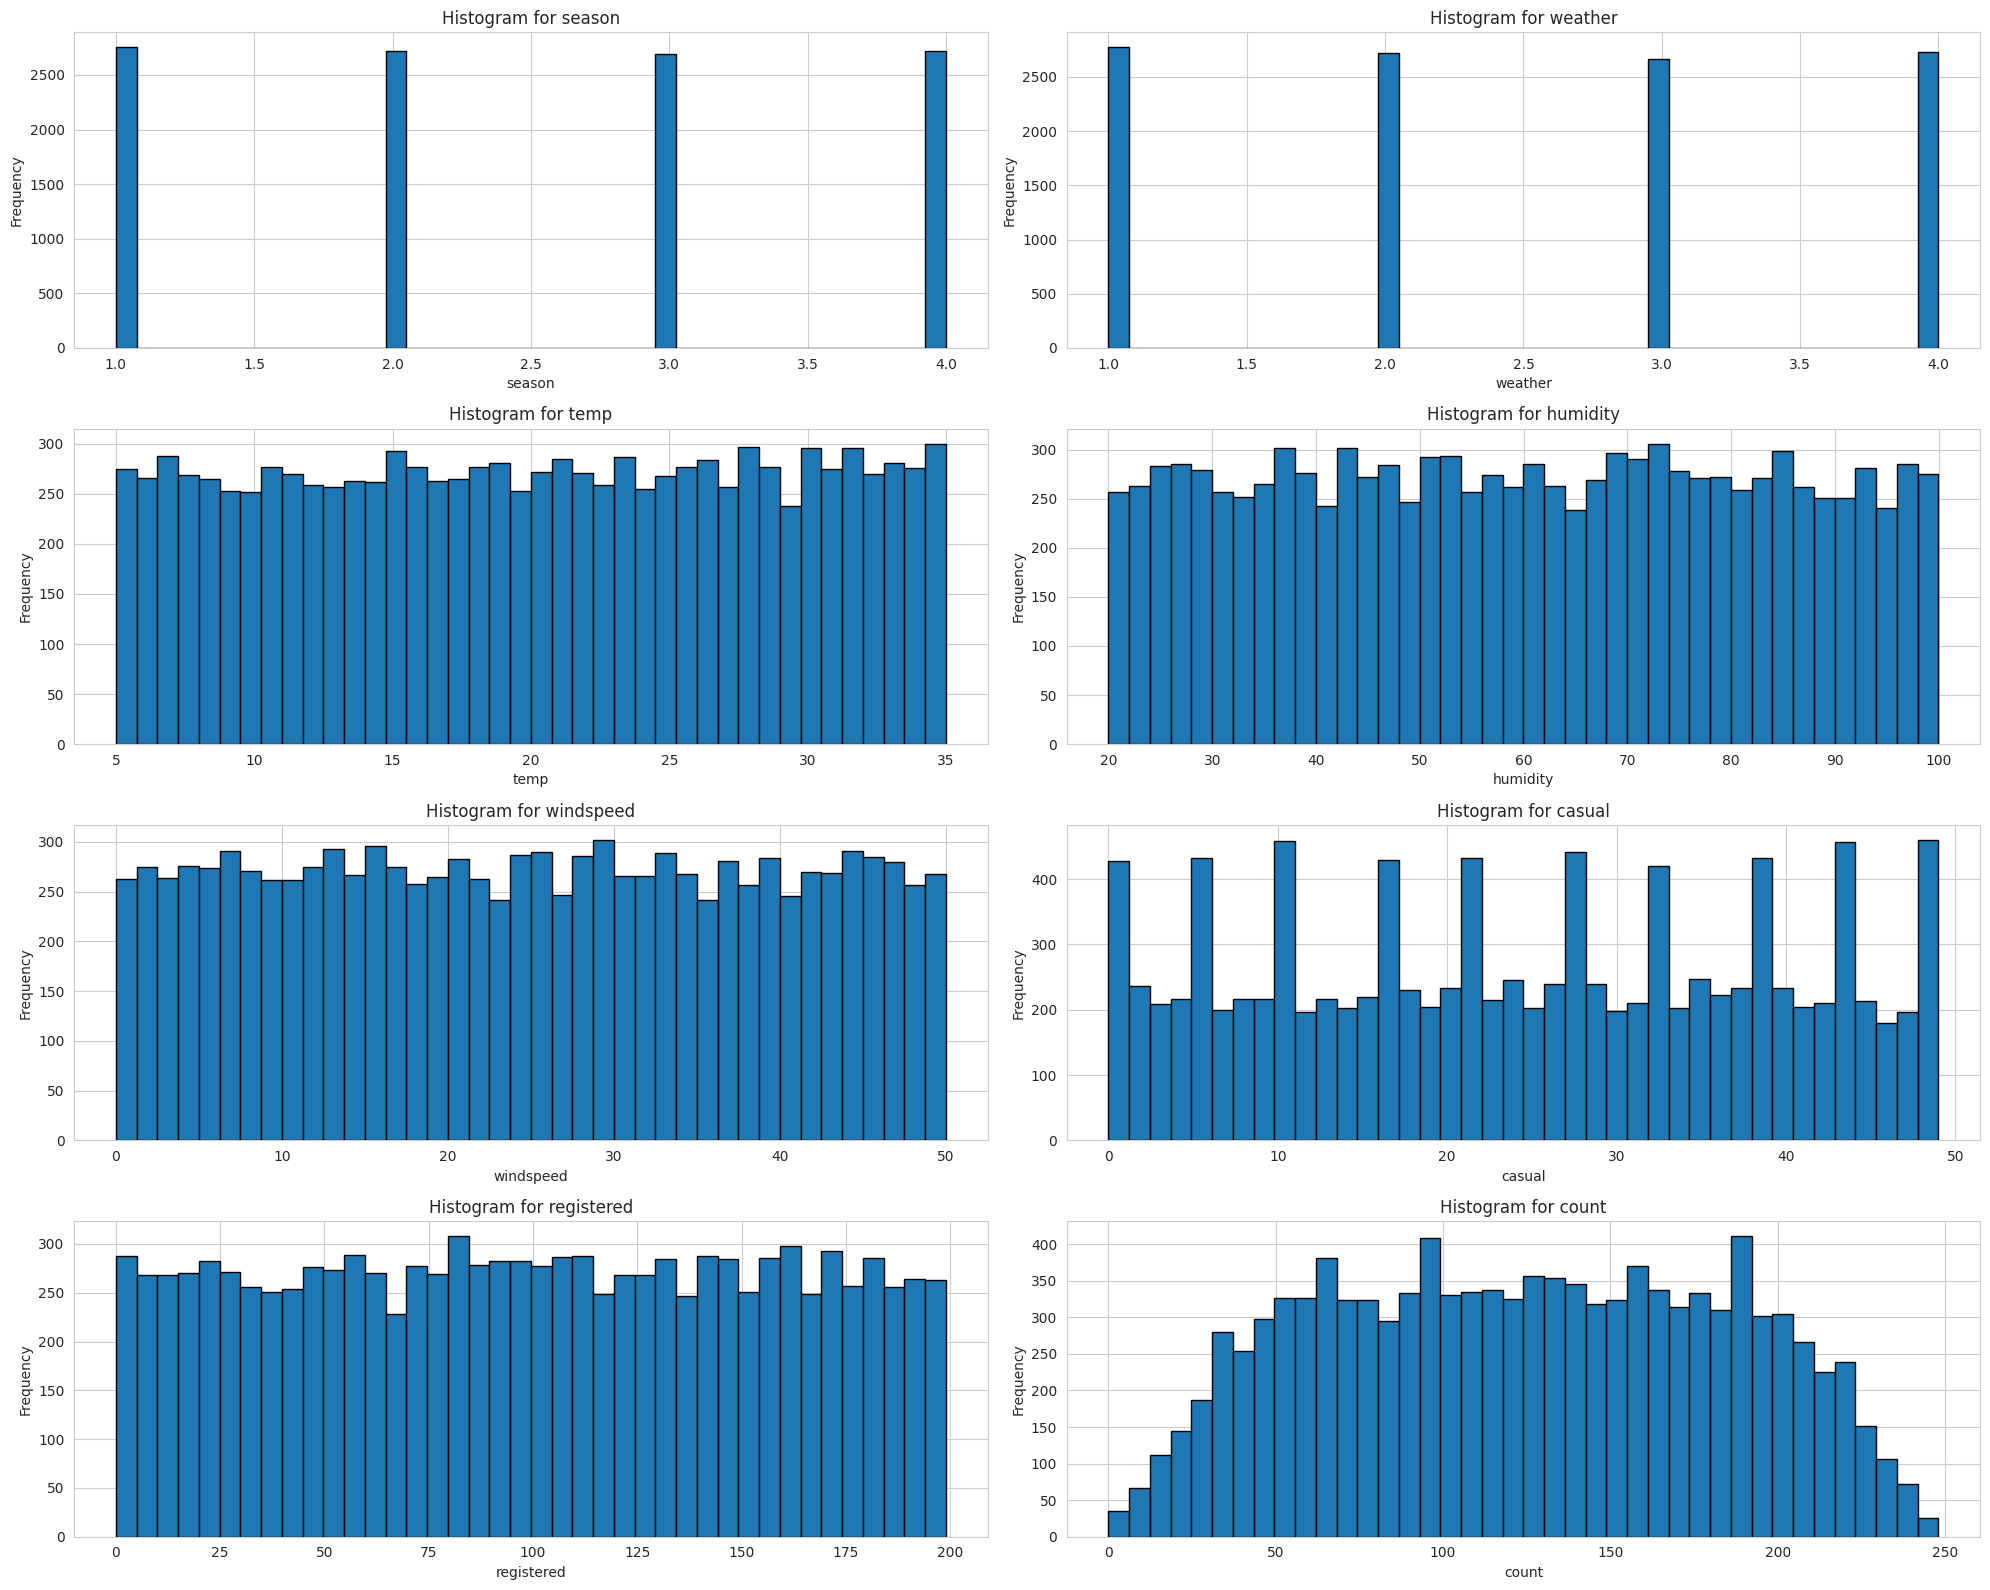

In [8]:
fig, axes = plt.subplots(nrows=(len(cols) + 1) // 2, ncols=2, figsize=(20, 4 * ((len(cols) + 1) // 2)))
axes = axes.flatten()

for i, features in enumerate(cols):
    axes[i].hist(df[features].dropna(), bins=40, edgecolor='black')
    axes[i].set_title(f"Histogram for {features}")
    axes[i].set_xlabel(features)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [9]:
# fig, axes = plt.subplots(nrows=(len(cols) + 1) // 2, ncols=2, figsize=(20, 4 * ((len(cols) + 1) // 2)))
# axes = axes.flatten()

# # Plot count plots for each feature in 'cols'
# for i, feature in enumerate(cols):
#     sns.countplot(x=feature, data=df, ax=axes[i])  # Using seaborn's countplot
#     axes[i].set_title(f"Count Plot for {feature}")
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel("Count")

# # Hide any unused subplots if there are extra axes
# for j in range(i + 1, len(axes)):
#     axes[j].axis('off')

# # Adjust layout for better spacing between plots
# plt.tight_layout()
# plt.show()

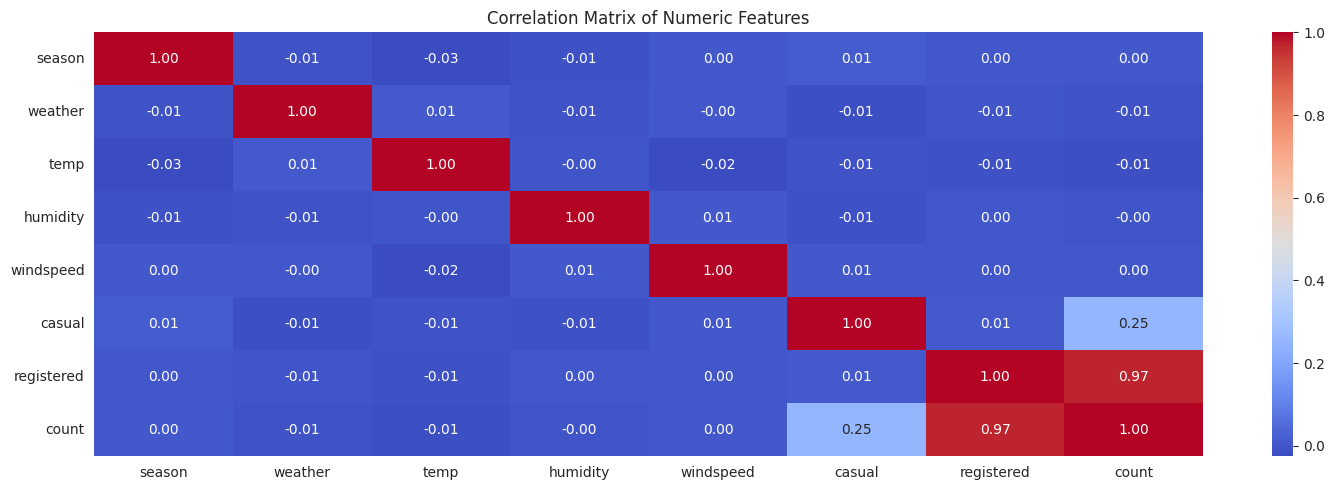

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=4:
    plt.figure(figsize=(15,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
    plt.title(f'Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()


# Model Section

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler


In [12]:
X = df.drop(columns=['temp', 'humidity', 'windspeed',
       'casual', 'registered', 'count','datetime'])
y = df['registered']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
# scaler = StandardScaler()

In [15]:
# X_trian_scaled = scaler.fit_transform(X_train)
# y_train
# y_trian_scaled = scaler.fit_transform(y_train)

In [16]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)
}

In [17]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

In [18]:
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

              Model  R2 Score        MSE     RMSE      MAE
4      DecisionTree    0.0010  3229.8289  56.8316  48.9116
9           XGBoost    0.0010  3229.8289  56.8316  48.9116
5      RandomForest    0.0009  3230.0260  56.8333  48.9141
6  GradientBoosting    0.0009  3229.9767  56.8329  48.9094
2             Lasso   -0.0001  3233.3379  56.8624  48.9535
3        ElasticNet   -0.0001  3233.3379  56.8624  48.9535
7          AdaBoost   -0.0002  3233.7452  56.8660  48.9101
0  LinearRegression   -0.0006  3234.7552  56.8749  48.9666
1             Ridge   -0.0006  3234.7551  56.8749  48.9666
8        KNeighbors   -0.1554  3735.4657  61.1185  51.6606


# Conclusion:
> Just Giving the Poor results.
>
> Should be more features present or better features.
>
> After cross val performace is not better

# Cross Val

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Decision Tree
dt_params = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

dt_model = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='r2')
dt_grid.fit(X, y)

print("Best DecisionTree params:", dt_grid.best_params_)
print("Best R²:", dt_grid.best_score_)


Best DecisionTree params: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R²: -0.003112911981580857
